# **Convolutional Neural Network (CNN)**

## **Convolution in Mathematics**
Mathematically, convolution is a way to combine two functions to produce a third function that expresses how one shape modifies the other.

### **1D Continuous Convolution**
Given two functions $f(t)$ and $g(t)$, their convolution is:
$$
(f * g)(t) = \int_{-∞}^{∞}f(\tau)) \cdot g(t - \tau)dτ
$$
This does the following:
- Flip $g(\tau)$ -> becomes $g(-\tau)$
- Shift it by $t$ -> becomes $g(t - \tau)$
- Multiply it pointwise with $f(\tau)$
- Integrate (sum) over all time

<font color='blue'>Think of it as **sliding** one function over another and calculating how much they overlap at each step.</font>


### **2D Convolution**
- An image ***I*** is a 2D array (matrix) of pixel values
- A filter or kernel ***K*** is a smaller matrix (e.g., 3×3)

Then the convolution operation at position $(i, j)$ is:
$$
(I * K)[i, j] = ∑\limits_{m}\sum\limits_{n}I[i + m, j + n] \cdot K[m, n]
$$

We slide the kernel over the image, and at each location:
- Multiply corresponding entries
- Sum them to get one number
- Place that number in the output feature map

## Intuitive Example: Moving average for Noise Reduction
Let’s say you are measuring the outside temperature every minute:
```
f = [22, 23, 21, 24, 25, 23, 22]
```

Now you want to smooth the data using a **3-point moving average**. This is effectively a convolution with a kernel:
```
g = [1/3, 1/3, 1/3]  # Averaging filter (simple kernel)
```

The convolution at time $t = 3$ looks like this:
$$
(f * g)[3] = \frac{1}{3} \cdot f[2] + \frac{1}{3} \cdot f[3] + \frac{1}{3} \cdot f[4] + \frac{1}{3} \cdot 21 + \frac{1}{3} \cdot 24 \frac{1}{3} \cdot 25 = \frac{70}{3} ≈ 23.33
$$

This gives you a smoothed temperature at time 3. Repeating this across all time points gives you a smoother signal — **you convolved the signal with a kernel.**

| Term      | Meaning                                                |
| --------- | ------------------------------------------------------ |
| $f(t)$    | Original function or signal                            |
| $g(t)$    | Filter or kernel                                       |
| $f * g$   | New function showing how $g$ overlaps/modifies $f$     |
| Use cases | Smoothing, edge detection, filtering, pattern matching |

### **2D Convolution on Images**
An image is just a 2D matrix of numbers. For a grayscale image, each number represents a pixel's brightness (0 = black, 255 = white).

**Image Matrix I:**
```
I = [[10, 10, 10, 10, 10],
     [10, 20, 20, 20, 10],
     [10, 20, 30, 20, 10],
     [10, 20, 20, 20, 10],
     [10, 10, 10, 10, 10]]

```
It has a brighter region in the center.

Now you want to detect edges, so you apply a filter (kernel):
**Kernel K: Sobel Edge Detector**
```
K = [[-1, -1, -1],
     [-1,  8, -1],
     [-1, -1, -1]]

```

**Convolution Operation (No Padding, Stride = 1)**
1. Place the 3×3 kernel on the top-left corner of the image.
2. Multiply each overlapping value from image × kernel.
3. Sum the result.
4. That sum becomes the output pixel at that position.
5. Slide the kernel by one pixel to the right and repeat.

**Example: centered at pixel(2, 2) (1-indexed)**
We take the 3×3 patch from the image centered at the middle:
```
Patch:
[[20, 20, 20],
 [20, 30, 20],
 [20, 20, 20]]

```
Apply the kernel:

= -1*20 + -1*20 + -1*20
  + -1*20 + 8*30 + -1*20
  + -1*20 + -1*20 + -1*20

= (-20 -20 -20) + (-20 + 240 -20) + (-20 -20 -20)
= -60 + 200 -60 = **80**

So the output at that position (2,2) is 80 — this means there is an edge detected!

📌 Interpretation
- The kernel (filter) looks for a pattern (like edges).
- Convolution is the process of scanning for where that pattern matches.
- Bright spots in the output = strong match to the filter (e.g., an edge is there).



# **Further Reading about Images and Colors** (Skip if not interested)

More information about data representation can be found [here](https://www.csfieldguide.org.nz/en/chapters/data-representation/images-and-colours/).

## How many bits will we need for each colour in the image?

With 256 different possible values for the amount of each primary colour, this means 8 bits would be needed to represent the number.

$2^8$
=
2
×
2
×
2
×
2
×
2
×
2
×
2
×
2
=
256

The smallest number that can be represented using 8 bits is 00000000 – which is 0. And the largest number that can be represented using 8 bits is 11111111 – which is 255.

Because there are three primary colours, each of which will need 8 bits to represent each of its 256 different possible values, we need 24 bits in total to represent a colour.

3
×
8
=
24

So, how many colours are there in total with 24 bits? We know that there is 256 possible values each colour can take, so the easiest way of calculating it is:

256
×
256
×
256
=
16
,
777
,
216

This is the same as
$2^24$.

Because 24 bits are required, this representation is called 24 bit colour. 24 bit colour is sometimes referred to in settings as "True Color" (because it is more accurate than the human eye can see). On Apple systems, it is called "Millions of colours".

## How do we use bits to represent the colour?
A logical way is to use 3 binary numbers that represent the amount of each of red, green, and blue in the pixel. In order to do this, convert the amount of each primary colour needed to an 8 bit binary number, and then put the 3 binary numbers side by side to give 24 bits.

Because consistency is important in order for a computer to make sense of the bit pattern, we normally adopt the convention that the binary number for red should be put first, followed by green, and then finally blue. The only reason we put red first is because that is the convention that most systems assume is being used. If everybody had agreed that green should be first, then it would have been green first.

For example, suppose you have the colour that has red = 145, green = 50, and blue = 123 that you would like to represent with bits.

Start by converting each of the three numbers into binary, using 8 bits for each.

You should get: - red = 10010001, - green = 00110010, - blue = 01111011.

Putting these values together gives 100100010011001001111011, which is the bit representation for the colour above.

There are no spaces between the three numbers, as this is a pattern of bits rather than actually being three binary numbers, and computers don’t have any such concept of a space between bit patterns anyway – everything must be a 0 or a 1. You could write it with spaces to make it easier to read, and to represent the idea that they are likely to be stored in 3 8-bit bytes, but inside the computer memory there is just a sequence of high and low voltages, so even writing 0 and 1 is an arbitrary notation.

Also, all leading and trailing 0’s on each part are kept – without them, it would be representing a shorter number. If there were 256 different possible values for each primary colour, then the final representation must be 24 bits long.



# **Convolutional Neural Network (CNN)**

A Convolutional Neural Network (CNN) is a type of deep learning model designed specifically for processing grid-like data, such as images.

## **CNN Architecture: Key Components**

1. **Convolutional Layer**
  - Slides small filters (also called kernels) over the image.
  - Each filter detects specific patterns like edges, corners, textures.
  - Output is called a **feature map**.
2. **ReLU Activation**
  - Adds non-linearity so the model can learn complex patterns.
  - Just sets all negative values to zero.
3. **Pooling Layer (e.g., Max Pooling)**
  - Downsamples the feature map to reduce computation.
  - Keeps the most important features (e.g., max value in a region).
4. **Fully Connected (Dense) Layers**
  - At the end, we flatten everything and use normal neural network layers to make predictions.

## **Convolutional Layer**

The convolutional layer is the most important layer of a CNN; responsible for dealing with the major computations. The convolutional layer includes **input data**, a **filter**, and a **feature map**.

To illustrate how it works, let’s assume we have a color image as input. This image is made up of a matrix of pixels in 3D, representing the three dimensions of the image: height, width, and depth.

The filter — which is also referred to as kernel — is a two-dimensional array of weights, and is typically a 3×3 matrix. It is applied to a specific area of the image, and a dot product is computed between the input pixels and the weights in the filter.

The convolutional layer computes a **dot product** between the **filter value** and the **image pixel** values, and the matrix formed by sliding the filter over the image is called the **Convolved Feature**, **Activation Map**, or **Feature Map**.

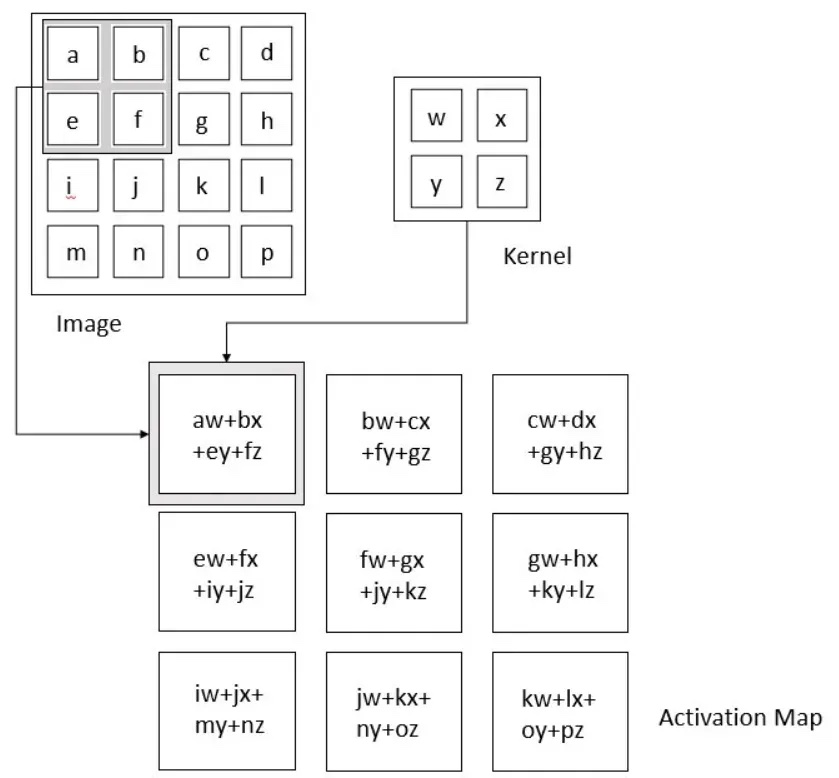

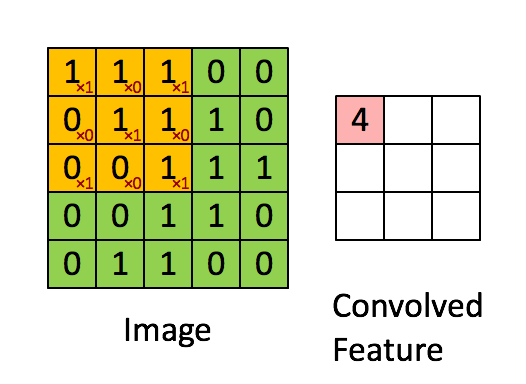

The behavior of the convolutional layer is primarily governed by the following main hyperparameters:

- **Kernel size:** It determines the size of the sliding window. It is generally recommended to use smaller window sizes, preferably odd values such as 1, 3, 5, and occasionally, rarely 7.

- **Stride:** The stride parameter determines the number of pixels the kernel window will move during each step of convolution. Typically, it is set to 1 to ensure that no locations are missed in an image. However, it can be increased if the intention is to simultaneously reduce the input size.

- **Padding:** Padding refers to the technique of adding zeros to the border of an image. By applying padding, the kernel can fully filter every position of an input image, ensuring that even the edges are properly processed.
  - Zero-padding
  - Valid padding: Also known as no padding. In this specific case, the last convolution is dropped if the dimensions do not align.
  - Same padding: This padding ensures that the output layer has the exact same size as the input layer.
  - Full padding: This kind of padding increases the size of the output by adding zeros to the borders of the input matrix.

- **Number of filters /Depth:** The number of filters in a convolutional layer determines the number of patterns or features that the layer will seek to identify. In other words, it governs the number of distinct characteristics or elements that the convolutional layer will focus on detecting.


The output size of the convoluted layer is determined by several factors, including the input size, kernel size, stride, and padding. The formula to calculate the output size is as follows:
Given:

- **Input size:** $W_{in} \times H_{in}$
- **Kernel(filter) size:** $K \times K$
- **Padding**: P(zero padding)
- **Stride:** S (how far the filter moves each step

$$
W_{out} = ⌊\frac{W_{in} - K + 2P}{S}⌋ + 1
$$

$$
H_{out} = ⌊\frac{H_{in} - K + 2P}{S}⌋ + 1
$$

Example: Imagine we have an input image with dimensions of 6x6 pixels. For the convolutional operation, we use a kernel with dimensions of 3x3 pixels, a stride of 1, and no padding (padding of 0).

output_size $= 1 + (6–3 + (2 * 0)) / 1 = 1 + (3 / 1) = 1 + 3 = 4.$

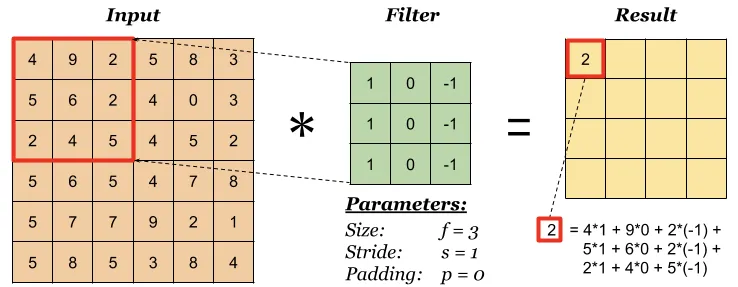

When the input has more than one channel (e.g. an RGB image), the filter should have a matching number of channels. To calculate one output cell, perform convolution on each matching channel, then add the result together.

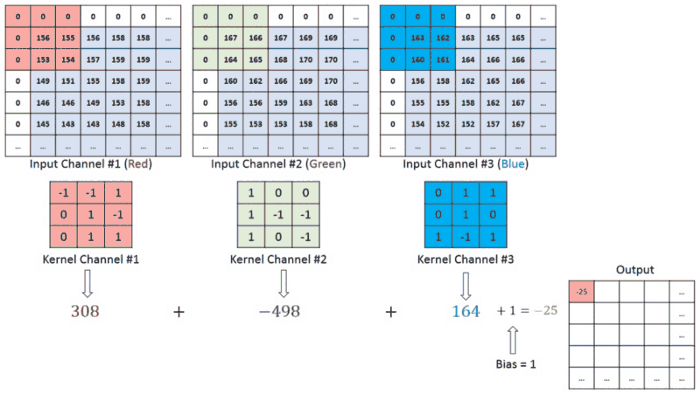

# **What Happens When a RGB Image (3 Channels) Goes Through a Conv Layer?**

Assume:
- The input image is shape (H, W, 3) → RGB image
- You apply a conv layer with K filters, each with kernel size (e.g., 3×3)

Key Concepts:
- **Each filter** in the convolutional layer has a separate 3D kernel:
  - Shape: (3, 3, 3) → because of 3 channels
  - Not just 3×3, but 3×3×3 (height × width × channels)
- For each filter:
  - It learns a different weight for each channel
  - The 3-channel kernel is slid across the image, and for each spatial position, the dot product is computed across all 3 channels → the results are summed into **one output pixel**

# **what happens when an RGB image (with 3 channels) passes through 2 convolutional layers**

## Inital Input: RGB image
- Shape: (Height, width, channel) = (H, W, 3)
- Example: (32, 32, 3) for CIFAR-10

## First Convolutional Layer
Assume:
- kernel size: 3x3
- Number of filters: 16
- Stride = 1, padding = same
### What happens:
- Each filter has shape: (3, 3, 3) → because input has 3 channels
- The kernel spans all 3 channels (R, G, B), and computes a single output value per spatial location
- Apply 16 different filters, s:

### Output of first conv layer:
- shape: (H, W, 16) -> e.g. (32, 32, 16)
- This is now a 16-channel feature map

## Second convolutional layer
Now the input is no longer RGB.

### Input:
- shape: (H, W, 16) -> 16 feature maps from layer 1

Assume:
- kernel size: 3x3
- Number of filters: e.g. 32

### What happens:
- Each filter in this layer has shape: (3, 3, 16)
  - The kernel spanns all 16 channels
- Each filter combines information from all 16 previous feature maps to produce 1 output map

## Output of second conv layer:
- shape: (H, W, 32) -> e.g. (32, 32, 32)

## Summary Table
| Layer                     | Input Shape  | Filter Shape    | Output Shape |
| ------------------------- | ------------ | --------------- | ------------ |
| Input (RGB image)         | (32, 32, 3)  | –               | –            |
| Conv Layer 1 (16 filters) | (32, 32, 3)  | (3, 3, 3) × 16  | (32, 32, 16) |
| Conv Layer 2 (32 filters) | (32, 32, 16) | (3, 3, 16) × 32 | (32, 32, 32) |


## ReLu Activation Function
After each convolution operation, we have the application of a Rectified Linear Unit (ReLU) function, which transforms the feature map and introduces nonlinearity.


## **The Pooling Layer**

Pooling layers, also referred to as downsampling, serve to reduce the dimensionality of the input, thereby decreasing the number of parameters. Similar to convolutional layers, pooling operations involve traversing a filter across the input. However, unlike convolutional layers, the pooling filter does not possess weights. Instead, the filter applies an aggregation function to the values within its receptive field, generating the output array.

Two primary types of pooling are commonly employed:
1. **Max Pooling:** It selects the pixel with the maximum value to send to the output array.
2. **Average pooling:** It calculates the average value within the receptive field to send to the output array.

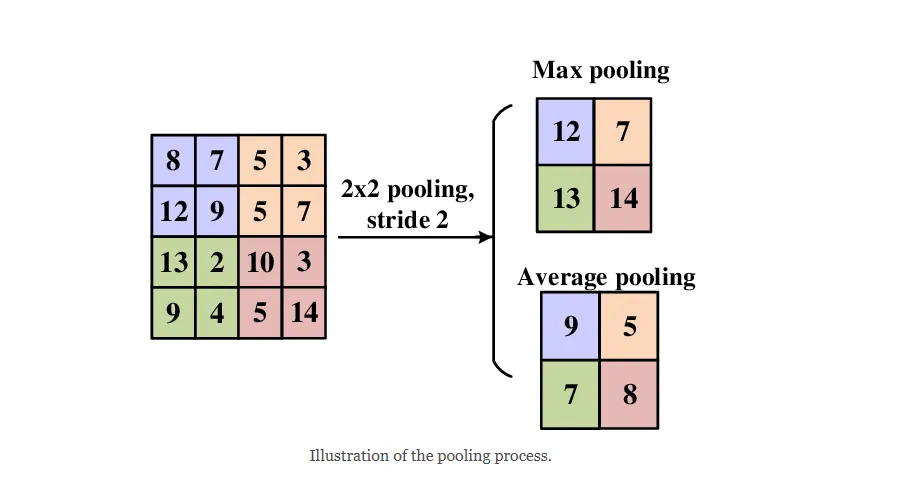

Pooling offers a significant advantage in that it does not require learning any parameters. However, this attribute also presents a potential drawback as pooling may discard crucial information. While pooling serves to reduce dimensionality and extract key features, there is a possibility that important details can be lost during this process.

## **Fully Connected Layer**

The Fully Connected Layer a.k.a dense layer aims to provide global connectivity between all neurons in the layer. The fully connected layer typically appears at the end of the ConvNet architecture, taking the flattened feature maps from the preceding convolutional and pooling layers as input. Its purpose is to combine and transform these high-level features into the final output, such as class probabilities or regression values, depending on the specific task.

This layer converts a three-dimensional layer in the network into a one-dimensional vector to fit the input of a fully-connected layer for classification. For example, a 5x5x2 tensor would be converted into a vector of size 50. This part is in principle the same as a regular Neural Network.



# Simple CNN

In [49]:
import tensorflow as tf
import numpy as np


# Load CIFAR-10 (or CIFAR-100)
(x_train_full, y_train_full), (x_test_full, y_test_full) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train_full, x_test_full = x_train_full / 255.0, x_test_full / 255.0

# --- Create a smaller subset ---
num_samples_per_class_train = 500 # Example: 500 images per class for training (total 5000 for 10 classes)
num_samples_per_class_test = 100  # Example: 100 images per class for testing (total 1000 for 10 classes)

x_train_small = []
y_train_small = []
x_test_small = []
y_test_small = []

num_classes = 10 # For CIFAR-10

for class_id in range(num_classes):
    # Training subset
    class_indices_train = np.where(y_train_full.flatten() == class_id)[0]
    selected_indices_train = np.random.choice(class_indices_train, num_samples_per_class_train, replace=False)
    x_train_small.append(x_train_full[selected_indices_train])
    y_train_small.append(y_train_full[selected_indices_train])

    # Testing subset
    class_indices_test = np.where(y_test_full.flatten() == class_id)[0]
    selected_indices_test = np.random.choice(class_indices_test, num_samples_per_class_test, replace=False)
    x_test_small.append(x_test_full[selected_indices_test])
    y_test_small.append(y_test_full[selected_indices_test])

x_train_small = np.concatenate(x_train_small, axis=0)
y_train_small = np.concatenate(y_train_small, axis=0)
x_test_small = np.concatenate(x_test_small, axis=0)
y_test_small = np.concatenate(y_test_small, axis=0)

# Shuffle the combined subsets
train_permutation = np.random.permutation(len(x_train_small))
x_train_small = x_train_small[train_permutation]
y_train_small = y_train_small[train_permutation]

test_permutation = np.random.permutation(len(x_test_small))
x_test_small = x_test_small[test_permutation]
y_test_small = y_test_small[test_permutation]

print(f"Smaller training set shape: {x_train_small.shape}")
print(f"Smaller test set shape: {x_test_small.shape}")


Smaller training set shape: (5000, 32, 32, 3)
Smaller test set shape: (1000, 32, 32, 3)


In [50]:
sample, sample_label = x_train_small[0], y_train_small[0]

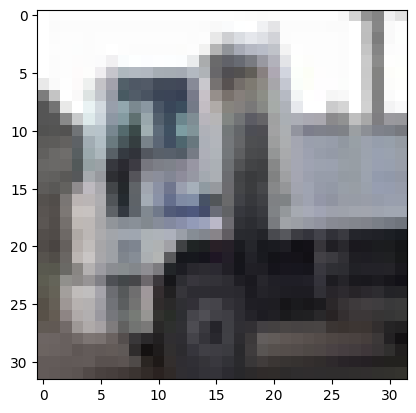

In [51]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(sample)
plt.show()

In [52]:
import matplotlib.pyplot as plt

# Show multi-channel feature map
def show_feature_maps(fmaps, title_prefix=""):
    num_filters = fmaps.shape[-1]
    fig, axes = plt.subplots(1, num_filters, figsize=(15, 5))
    for i in range(num_filters):
        axes[i].imshow(fmaps[:, :, i], cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'{title_prefix} #{i+1}')
    plt.show()

In [53]:
from scipy.signal import convolve2d

def conv_layer(input_image, filters):
    h, w, in_channels = input_image.shape
    kh, kw, _, out_channels = filters.shape
    output = np.zeros((h, w, out_channels))
    for o in range(out_channels):
        for c in range(in_channels):
            output[:, :, o] += convolve2d(input_image[:, :, c], filters[:, :, c, o], mode='same', boundary='symm')
    return np.clip(output, 0, 255)

In [54]:
def max_pool(img, pool_size=2):
    h, w, c = img.shape
    out_h, out_w = h // pool_size, w // pool_size
    pooled = np.zeros((out_h, out_w, c))
    for i in range(out_h):
        for j in range(out_w):
            for k in range(c):
                pooled[i, j, k] = np.max(img[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size, k])
    return pooled

In [55]:
def dense_layer(input_vector, output_size=128):
    weights = np.random.randn(output_size, input_vector.shape[0])
    output = np.dot(weights, input_vector)
    return output

# Apply a simple forepass CNN

▶ Input image shape: (32, 32, 3)


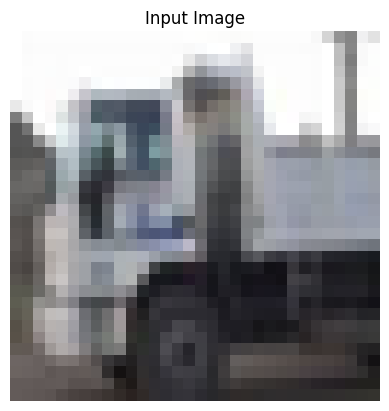

In [56]:
print("▶ Input image shape:", sample.shape)
plt.imshow(sample, cmap='gray')
plt.title("Input Image")
plt.axis("off")
plt.show()

In [57]:
# Filter 1: Vertical Edge Detector (Red Channel Dominant)
filter1 = np.array([
    [[-1, 0, 0], [-1, 0, 0], [-1, 0, 0]],
    [[ 0, 0, 0], [ 0, 0, 0], [ 0, 0, 0]],
    [[ 1, 0, 0], [ 1, 0, 0], [ 1, 0, 0]]
], dtype=np.float32)

# Filter 2: Horizontal Edge Detector (Green Channel Dominant)
filter2 = np.array([
    [[0, -1, 0], [0, 0, 0], [0, 1, 0]],
    [[0, -1, 0], [0, 0, 0], [0, 1, 0]],
    [[0, -1, 0], [0, 0, 0], [0, 1, 0]]
], dtype=np.float32)
filter2 = np.transpose(filter2, (1, 0, 2)) # Transpose to make it horizontal

# Filter 3: Blur/Smooth Filter (All Channels)
filter3 = np.array([
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]],
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]],
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]
], dtype=np.float32)

# Filter 4: Color Emphasis Filter (Blue Channel Detector)
filter4 = np.array([
    [[-0.1, -0.1,  0.5], [-0.1, -0.1,  0.5], [-0.1, -0.1,  0.5]],
    [[-0.1, -0.1,  0.5], [-0.1, -0.1,  0.5], [-0.1, -0.1,  0.5]],
    [[-0.1, -0.1,  0.5], [-0.1, -0.1,  0.5], [-0.1, -0.1,  0.5]]
], dtype=np.float32)

filters1 = np.stack([filter1, filter2, filter3, filter4], axis=-1)

▶ After Conv Layer 1: (32, 32, 4)


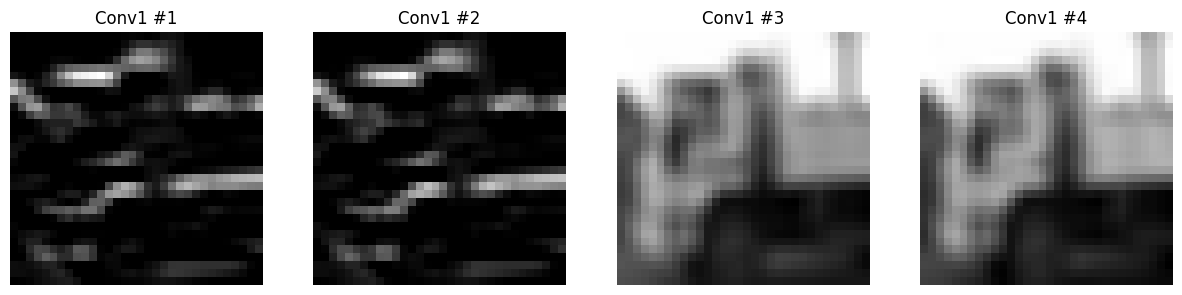

In [58]:
# 1st Conv Layer: 3x3x3 → 4 filters
# filters1 = np.random.randn(3, 3, 3, 4) * 0.1
conv1_out = conv_layer(sample, filters1)
print("▶ After Conv Layer 1:", conv1_out.shape)
show_feature_maps(conv1_out, "Conv1")

In [59]:
# Filter 1: Sum of Edges (Vertical and Horizontal)
filter_A1 = np.array([[[1.0, 1.0, 0.0, 0.0]]], dtype=np.float32)

# Filter 2: Negative of Edges
# This filter detects the opposite of the edge patterns, highlighting flat regions.
filter_A2 = np.array([[[ -1.0, -1.0, 0.0, 0.0]]], dtype=np.float32)

# Filter 3: Color and Blur Combination
# This filter averages the color and blur feature maps, creating a combined smooth-color feature.
filter_A3 = np.array([[[0.0, 0.0, 0.5, 0.5]]], dtype=np.float32)

# Filter 4: Pass-through (Vertical Edge)
# This filter is designed to simply pass the vertical edge information to the next layer,
# effectively acting as a "filter selector."
filter_A4 = np.array([[[1.0, 0.0, 0.0, 0.0]]], dtype=np.float32)

filters2 = np.stack([filter_A1, filter_A2, filter_A3, filter_A4], axis=-1)

▶ After Conv Layer 2: (32, 32, 4)


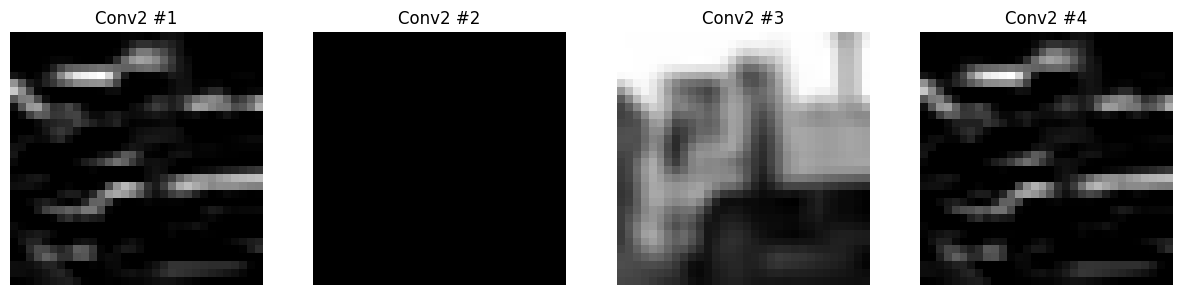

In [60]:
# 2nd Conv Layer: 1x1x4 → 4 filters
# filters2 = np.random.randn(1, 1, 4, 4) * 0.1
conv2_out = conv_layer(conv1_out, filters2)
print("▶ After Conv Layer 2:", conv2_out.shape)
show_feature_maps(conv2_out, "Conv2")

▶ After Max Pooling: (16, 16, 4)


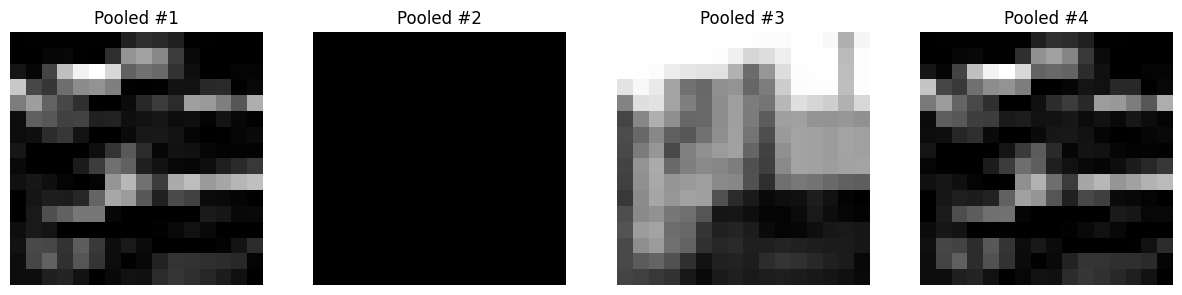

In [61]:
# Pooling
pooled = max_pool(conv2_out, pool_size=2)
print("▶ After Max Pooling:", pooled.shape)
show_feature_maps(pooled, "Pooled")

In [62]:
# Flatten and Dense Layer
flattened = pooled.flatten()
dense_out = dense_layer(flattened, 128)
print("▶ Dense layer output shape:", dense_out.shape)
print(dense_out)

▶ Dense layer output shape: (128,)
[-6.11029402e+00 -4.79632343e+01  3.50911450e+01 -5.45780577e+01
  3.50031352e+01 -2.23835247e+01  4.03046688e+01  3.68610050e+01
 -3.31712252e+01  7.53344338e+00 -7.53911950e+01 -2.96112249e+01
  2.65736359e+00 -6.81875316e+00  5.64385321e+00 -6.21715891e+01
  4.69410346e+00  1.68610082e+01 -2.86546275e+01 -2.09139030e+01
  1.81672528e+01  3.05438924e+01  2.20205447e+01 -2.81619163e+01
 -5.10142928e+01  1.43118455e+01  2.66839694e+01  3.59905096e+01
  9.23124999e+00  5.34429418e+01 -3.35520729e+01  5.92175987e+00
  6.03108825e+01 -5.27105268e+01 -3.31769949e+01 -2.35311088e+00
 -5.73137608e+01  1.96092150e+00 -2.49169639e+01 -1.14331084e+01
  1.26110462e+02 -1.01940587e+01  1.13154564e+01 -3.76270093e+01
  2.31694642e+01  2.30678644e+01 -6.44159614e+01 -8.35978329e+00
 -3.06857492e+01 -7.71346636e+00  1.51418388e+01 -3.18745067e+01
  4.00350344e+01 -2.18768624e+01 -4.33954858e+01 -2.63977097e+00
 -3.28058694e+01 -2.61356862e+01 -1.13870125e-01  4.096

# Build Simple Full CNN

In [63]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [64]:
'''
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
'''


# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer: 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_small, y_train_small, epochs=10,
                    validation_data=(x_test_small, y_test_small),
                    batch_size=64)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.1398 - loss: 2.2468 - val_accuracy: 0.3140 - val_loss: 1.8367
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.3047 - loss: 1.8551 - val_accuracy: 0.3410 - val_loss: 1.6940
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.3575 - loss: 1.6990 - val_accuracy: 0.3950 - val_loss: 1.6312
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.4097 - loss: 1.6037 - val_accuracy: 0.4020 - val_loss: 1.5668
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.4380 - loss: 1.5146 - val_accuracy: 0.4490 - val_loss: 1.5386
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.4660 - loss: 1.4672 - val_accuracy: 0.4490 - val_loss: 1.5715
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.4728 - loss: 1.4468 - val_accuracy: 0.4820 - val_loss: 1.4049
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.5377 - loss: 1.2973 - val_accuracy: 0.4740 

In [67]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test_small, y_test_small, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

32/32 - 1s - 18ms/step - accuracy: 0.5040 - loss: 1.4010

Test accuracy: 0.5040
